In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.integrate as scpi

import cbmos_serial as cbmos
import force_functions as ff
import euler_forward as ef
import adams_bashforth as ab
import midpoint as md
import heun as he
import cell as cl

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
          'axes.labelsize': 'xx-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'xx-large',
          'ytick.labelsize':'xx-large',
          'font.size': 11,
          'font.family': 'serif',
          'mathtext.fontset': 'dejavuserif',
          'axes.titlepad': 12,
         'axes.labelpad': 12}
plt.rcParams.update(params)

In [2]:
# Simulation parameters
s = 1.0    # rest length
tf = 1.0  # final time
rA = 1.5   # maximum interaction distance

seed=17
mu_cubic=5.70
params_cubic = {"mu": mu_cubic, "s": s, "rA": rA}
muR = 9.1
ratio = 0.21
params_poly = {'muA': muR*ratio, 'muR': muR, 'rA': rA, 'rR': 1.0/(1.0-np.sqrt(ratio)/3.0), 'n': 1.0, 'p': 1.0}
mu_gls = 1.95
params_gls = {'mu': mu_gls, 'a': 7.51}
params = {'cubic': params_cubic, 'pw. quad.': params_poly, 'GLS': params_gls}

In [3]:
force_names = ['cubic', 'pw. quad.', 'GLS']


defcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = {'cubic': defcolors[0], 'pw. quad.': defcolors[5], 'GLS': defcolors[6]}

linestyles = {'cubic': '-', 'pw. quad.': '--', 'GLS': '-.'}



In [4]:
solvers = {'pw. quad.': cbmos.CBMSolver(ff.piecewise_polynomial, scpi.solve_ivp, 1), 
             'cubic': cbmos.CBMSolver(ff.cubic, scpi.solve_ivp, 1),
             'GLS': cbmos.CBMSolver(ff.gls, scpi.solve_ivp, 1)}

In [5]:
# Initial condition
cell_list = [cl.Cell(0, [0], proliferating=True), cl.Cell(1, [0.3], proliferating=True)]
t_data_tf1 = np.linspace(0,tf,100*tf)

In [6]:
soltf1 = {'cubic': [], 'pw. quad.': [], 'GLS': []}
for force in force_names:
    history = solvers[force].simulate(cell_list, t_data_tf1, params[force], {}, seed=seed, raw_t=False)
    y = np.array([np.abs(clt[1].position - clt[0].position) for clt in history])
    soltf1[force] = y

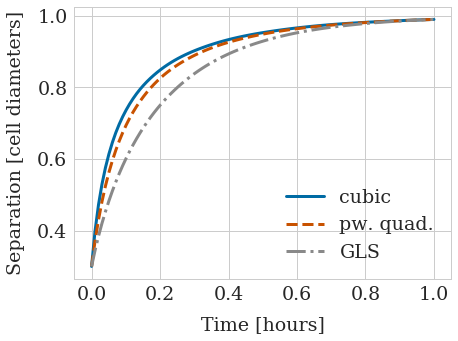

In [7]:
for force in force_names: 
    plt.plot(t_data_tf1, soltf1[force], label=force, color=colors[force], linestyle=linestyles[force])
plt.legend()
plt.xlabel('Time [hours]')
plt.ylabel('Separation [cell diameters]')
plt.savefig('relaxation_dynamics.pdf', bbox_inches='tight')
plt.savefig('relaxation_dynamics.eps', bbox_inches='tight')

In [8]:
tf = 2.0
t_data_tf2 = np.linspace(0,tf,100*tf)
params_cubic = {"mu": mu_cubic/tf, "s": s, "rA": rA}
params_poly = {'muA': muR/tf*ratio, 'muR': muR/tf, 'rA': rA, 'rR': 1.0/(1.0-np.sqrt(ratio)/3.0), 'n': 1.0, 'p': 1.0}
params_gls = {'mu': mu_gls/tf, 'a':-2*np.log(0.002/mu_gls/tf)}
params = {'cubic': params_cubic, 'pw. quad.': params_poly, 'GLS': params_gls}

In [9]:
soltf2 = {'cubic': [], 'pw. quad.': [], 'GLS': []}
for force in force_names:
    history = solvers[force].simulate(cell_list, t_data_tf2, params[force], {}, seed=seed, raw_t=False)
    y = np.array([np.abs(clt[1].position - clt[0].position) for clt in history])
    soltf2[force] = y

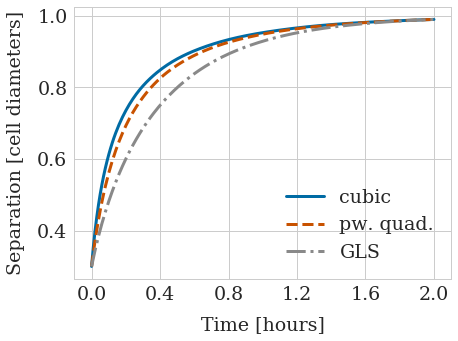

In [10]:
for force in force_names: 
    plt.plot(t_data_tf2, soltf2[force], label=force, color=colors[force], linestyle=linestyles[force])
plt.legend()
plt.xlabel('Time [hours]')
plt.ylabel('Separation [cell diameters]')
plt.xticks(np.arange(0.0, 2.4, 0.4))
plt.savefig('relaxation_dynamics_trelax2.pdf', bbox_inches='tight')
plt.savefig('relaxation_dynamics_trelax2.eps', bbox_inches='tight')

# Combine figures into single figure via subplot:

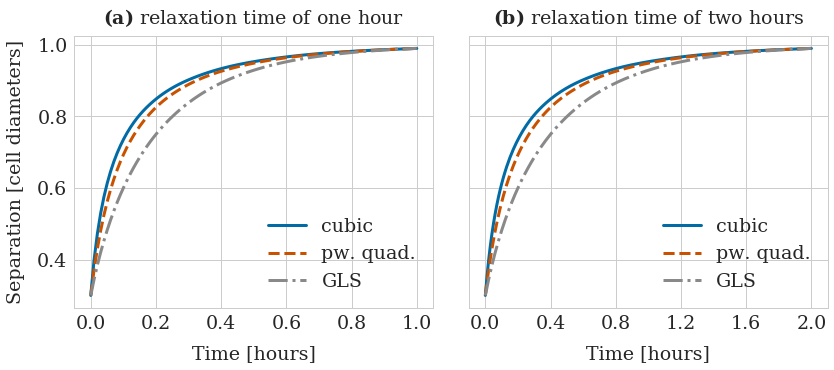

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13.5, 5), gridspec_kw={'wspace': 0.1})

# ax1
for force in force_names: 
    ax1.plot(t_data_tf1, soltf1[force], label=force, color=colors[force], linestyle=linestyles[force])
ax1.legend()
ax1.set(xlabel='Time [hours]', ylabel='Separation [cell diameters]')
ax1.label_outer()
ax1.set_xticks(np.arange(0.0, 1.2, 0.2))
ax1.set_title(r'$\bf{(a)}$ relaxation time of one hour')

# ax2
for force in force_names: 
    ax2.plot(t_data_tf2, soltf2[force], label=force, color=colors[force], linestyle=linestyles[force])
ax2.legend()
ax2.set_xticks(np.arange(0.0, 2.4, 0.4))
ax2.set(xlabel='Time [hours]', ylabel='Separation [cell diameters]')
ax2.label_outer()
ax2.set_title(r'$\bf{(b)}$ relaxation time of two hours')

# add a big axis, hide frame
#fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.grid(False)
#plt.xlabel('Time [hours]')
#plt.ylabel('Separation [cell diameters]')
plt.savefig('Fig5_combined.pdf', bbox_inches='tight')
plt.savefig('Fig5_combined.png', bbox_inches='tight')